In [8]:
import os
import sys
sys.path.append(os.path.abspath('../../..')) 
from plotting_utils import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns

%matplotlib inline
set_matplotlib_style()


# Default Minigrid

In [9]:
data_path = 'data/model-free-minigrid-all-params_data.csv'
df = pd.read_csv(data_path, index_col=0)
df['Model Type'] = df['ae_model_type']


model_type_map = {
  'ae': 'Continuous',
  'vqvae': 'Discrete',
  'fta_ae': 'FTA',
  'softmax_ae': 'Softmax AE',
}
df['Model Type'] = df['Model Type'].apply(lambda x: model_type_map[x])
df['Model Type'] = df.apply(
  (lambda x: x['Model Type'] if x['ae_recon_loss'] else 'End-to-End'), axis=1)

# Remove all softmax
df = df[df['ae_model_type'] != 'softmax_ae']
df.columns

,step,ep_length,ep_reward,reward,entropy,ae_model_type,ae_recon_loss,agg_func_const,beta,codebook_size,count,env_name,filter_size,learning_rate,ppo_entropy_coef,rl_start_step,experiment_key,Model Type
0,10000,912.500000,0.098750,0.000099,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.000030,0.0003,500000,9f89466bd4e04a34bc05310a61eed3de,Discrete
1,20000,838.916667,0.178308,0.000214,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.000030,0.0003,500000,9f89466bd4e04a34bc05310a61eed3de,Discrete
2,30000,965.454545,0.049273,0.000054,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.000030,0.0003,500000,9f89466bd4e04a34bc05310a61eed3de,Discrete
3,40000,886.000000,0.138964,0.000153,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.000030,0.0003,500000,9f89466bd4e04a34bc05310a61eed3de,Discrete
4,50000,868.833333,0.151383,0.000182,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.000030,0.0003,500000,9f89466bd4e04a34bc05310a61eed3de,Discrete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356829,960000,869.250000,0.151008,0.000181,4.413292,vqvae,True,0.0,0.000,256,True,minigrid-door-key-stochastic,6,0.000003,0.0300,500000,9db98a44ba0347b9ae86e6399735d1a4,Discrete
356830,970000,981.500000,0.036650,0.000037,4.413389,vqvae,True,0.0,0.000,256,True,minigrid-door-key-stochastic,6,0.000003,0.0300,500000,9db98a44ba0347b9ae86e6399735d1a4,Discrete
356831,980000,827.083333,0.205625,0.000247,4.416498,vqvae,True,0.0,0.000,256,True,minigrid-door-key-stochastic,6,0.000003,0.0300,500000,9db98a44ba0347b9ae86e6399735d1a4,Discrete
356832,990000,865.090909,0.157782,0.000174,4.418897,vqvae,True,0.0,0.000,256,True,minigrid-door-key-stochastic,6,0.000003,0.0300,500000,9db98a44ba0347b9ae86e6399735d1a4,Discrete


Average Performance

In [37]:
filter_config = {
    'learning_rate': [0.0003, 0.00003, 0.000003],
    'beta': [0.001, 0.01, 0.0],
    'agg_func_const': [0.0, 0.01, 100],
    'ppo_entropy_coef': [0.0, 0.3, 0.03, 0.003, 0.0003], 
}

query_string = ' & '.join([f"{key} == {value}" for key, value in filter_config.items()])
determ_env_df = df.query(query_string)
determ_env_df

# determ_env_df = determ_env_df.groupby(['experiment_key']).agg({
#     'step': 'max',
#     'ep_length': 'mean',
#     'ep_reward': 'mean',
#     'entropy': 'mean',
#     'reward': 'mean'
# })
# determ_env_df


[0.0003 0.003  0.03   0.3    0.    ]


,step,ep_length,ep_reward,reward,entropy,ae_model_type,ae_recon_loss,agg_func_const,beta,codebook_size,count,env_name,filter_size,learning_rate,ppo_entropy_coef,rl_start_step,experiment_key,Model Type
0,10000,912.500000,0.098750,0.000099,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.000030,0.0003,500000,9f89466bd4e04a34bc05310a61eed3de,Discrete
1,20000,838.916667,0.178308,0.000214,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.000030,0.0003,500000,9f89466bd4e04a34bc05310a61eed3de,Discrete
2,30000,965.454545,0.049273,0.000054,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.000030,0.0003,500000,9f89466bd4e04a34bc05310a61eed3de,Discrete
3,40000,886.000000,0.138964,0.000153,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.000030,0.0003,500000,9f89466bd4e04a34bc05310a61eed3de,Discrete
4,50000,868.833333,0.151383,0.000182,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.000030,0.0003,500000,9f89466bd4e04a34bc05310a61eed3de,Discrete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356829,960000,869.250000,0.151008,0.000181,4.413292,vqvae,True,0.0,0.000,256,True,minigrid-door-key-stochastic,6,0.000003,0.0300,500000,9db98a44ba0347b9ae86e6399735d1a4,Discrete
356830,970000,981.500000,0.036650,0.000037,4.413389,vqvae,True,0.0,0.000,256,True,minigrid-door-key-stochastic,6,0.000003,0.0300,500000,9db98a44ba0347b9ae86e6399735d1a4,Discrete
356831,980000,827.083333,0.205625,0.000247,4.416498,vqvae,True,0.0,0.000,256,True,minigrid-door-key-stochastic,6,0.000003,0.0300,500000,9db98a44ba0347b9ae86e6399735d1a4,Discrete
356832,990000,865.090909,0.157782,0.000174,4.418897,vqvae,True,0.0,0.000,256,True,minigrid-door-key-stochastic,6,0.000003,0.0300,500000,9db98a44ba0347b9ae86e6399735d1a4,Discrete


In [3]:
# df = df.drop('experiment_key', axis=1)
params = ['ae_model_type', 'ae_recon_loss',	'beta',	'codebook_size', 'count', 'env_name', 'filter_size', 
          'learning_rate', 'rl_start_step', 'Model Type', 'ppo_entropy_coef', 'agg_func_const', 'experiment_key']

df = df[df['step'] >= 500000]

average_df = df.groupby(params, as_index=False).mean()

average_df

,ae_model_type,ae_recon_loss,beta,codebook_size,count,env_name,filter_size,learning_rate,rl_start_step,Model Type,ppo_entropy_coef,agg_func_const,experiment_key,step,ep_length,ep_reward,reward,entropy
0,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.000003,500000,Discrete,0.0,0.0,08d852db5b744fc091b90b49fe31884f,750000.0,508.986592,0.507199,0.008656,4.330551
1,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.000003,500000,Discrete,0.0,0.0,15f70d547b9c423bad7e027041c7fbfe,750000.0,495.628426,0.523928,0.004532,4.253317
2,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.000003,500000,Discrete,0.0,0.0,18a4826c81c14437b077d709287ef12b,750000.0,359.246402,0.656680,0.012349,4.341076
3,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.000003,500000,Discrete,0.0,0.0,2e5e9390ae1542b7b2f2d1580def74f4,750000.0,569.629083,0.448397,0.003885,4.300544
4,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.000003,500000,Discrete,0.0,0.0,31f18b8faee0432e813d3fe8684de078,750000.0,587.089685,0.434806,0.004373,4.310555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.003000,500000,Discrete,0.3,100.0,e032777b9e7c420fa92a1d72e0837143,750000.0,947.890196,0.063417,0.000387,3.794944
3633,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.003000,500000,Discrete,0.3,100.0,f2164674790f46be826b008d34ee7586,750000.0,939.844118,0.072168,0.000396,3.810793
3634,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.003000,500000,Discrete,0.3,100.0,f71aa6e633d94377849136d7406e4062,750000.0,939.149760,0.072213,0.004256,3.809450
3635,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.003000,500000,Discrete,0.3,100.0,f8089bf8fbfe47b8bc56fec7226e3a1c,750000.0,935.872133,0.076827,0.000403,3.799218


# Best Performance

For simple exploration problem

3e-06
beta
0.000    120
0.001    358
0.010    361
Name: experiment_key, dtype: int64
beta
0.000    120
0.001    358
0.010    361
Name: experiment_key, dtype: int64
$\times\mathdefault{10^{6}}\mathdefault{}$


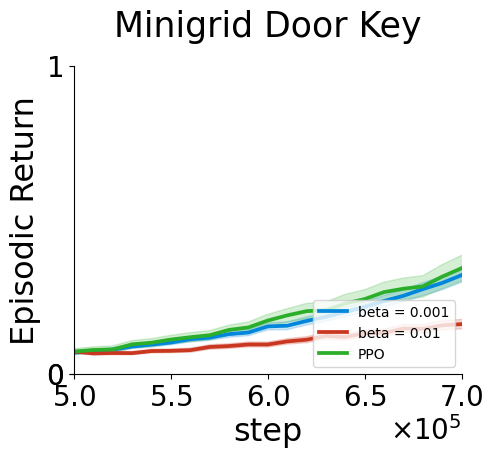

3e-05
beta
0.000    146
0.001    436
0.010    443
Name: experiment_key, dtype: int64
beta
0.000    146
0.001    436
0.010    443
Name: experiment_key, dtype: int64
$\times\mathdefault{10^{6}}\mathdefault{}$


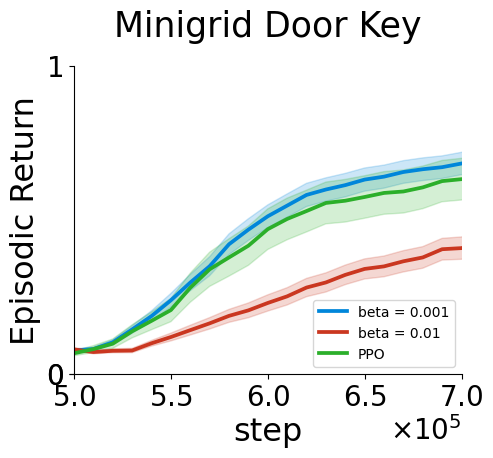

0.0003
beta
0.000    144
0.001    432
0.010    426
Name: experiment_key, dtype: int64
beta
0.000    144
0.001    432
0.010    426
Name: experiment_key, dtype: int64
$\times\mathdefault{10^{6}}\mathdefault{}$


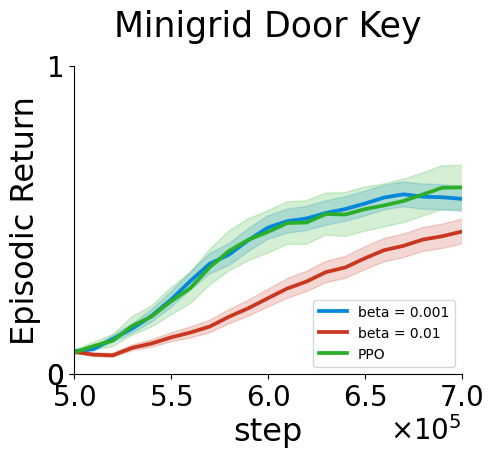

0.003
beta
0.000    116
0.001    313
0.010    342
Name: experiment_key, dtype: int64
beta
0.000    116
0.001    313
0.010    342
Name: experiment_key, dtype: int64
$\times\mathdefault{10^{6}}\mathdefault{}$


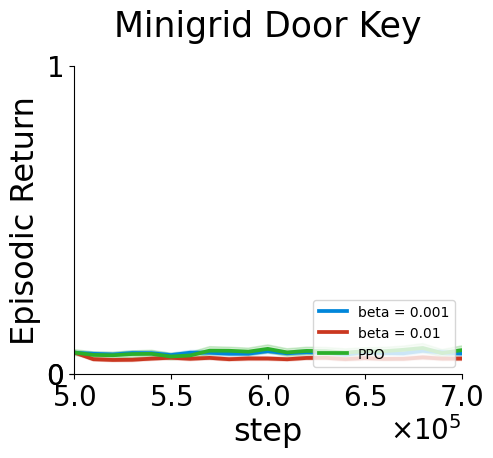

In [5]:
label_map = {0.0: "PPO", 0.001: "beta = 0.001", 0.01: "beta = 0.01"}

determ_env_df = df[
  ~df['env_name'].str.contains('-rand') &
  (
    (
      (df['rl_start_step'] > 100000) &
      
      df['ae_recon_loss']
    ) |
    ~df['ae_recon_loss']
  ) &
  ((df['Model Type'] == 'Continuous') | (df['Model Type'] == 'Discrete'))
]
determ_env_df = determ_env_df.dropna()
determ_env_df = determ_env_df[determ_env_df['beta'].isin([0.0, 0.001, 0.0001, 0.01])]



set_matplotlib_style(style='4-row')
determ_env_df = determ_env_df[determ_env_df['count']]
# determ_env_df = determ_env_df['beta'].isin([0.0, 0.001])


for env_name, group in determ_env_df.groupby(['env_name', 'learning_rate']):
  print(env_name[1])
  env_name = env_name[0]

  group['beta_label'] = group['beta'].map(label_map)
  hue_labels = group['beta'].apply(lambda x: f'beta = {x}')

  
  max_step = group['step'].max()
  if 'crossing' in env_name.lower():
    max_step = int(8e5)
  elif 'key' in env_name.lower():
    max_step = int(7e5)
  rl_start_step = group.iloc[0]['rl_start_step']

  print(group.groupby(['beta'])['experiment_key'].nunique())
  len_classes = len(group.groupby(['beta'])['experiment_key'].nunique())
  print(group.groupby(['beta'])['experiment_key'].nunique())
  color_palette = get_color_palette(n=len_classes)
  sns.lineplot(
    group, x='step', y='ep_reward', hue='beta_label',
    errorbar=t_distrib, palette=color_palette)
  
#   plt.axvline(x=rl_start_step, color='black', linestyle='--', alpha=0.3, linewidth=2)
  
  plt.title(f'{standardize_env_name(env_name)}')
  set_fig_labels('Time Steps', 'Episodic Return', xsci=True)
  plt.xlim(rl_start_step, max_step)
  
  max_y = 1
  plt.ylim(0, max_y)
  plt.gca().set_yticks([0, max_y // 2, max_y])
  plt.legend(loc='lower right')



  save_fig_versions(f'{standardize_env_name(env_name)}_delayed_rl_ep_len', type='png',dir='../../../figures/png')
  plt.show()

## PPO Entropy Coef Sensitivity

In [407]:
params = ['ae_model_type', 'ae_recon_loss',	'beta',	'codebook_size', 'count', 'env_name', 'filter_size', 
          'learning_rate', 'rl_start_step', 'Model Type', 'ppo_entropy_coef', 'agg_func_const']

agg_func_const = 0.0
determ_env_df = average_df.drop(columns=['experiment_key'])
determ_env_df = determ_env_df.dropna()
determ_env_df = determ_env_df[determ_env_df['learning_rate'].isin([0.00003])]
determ_env_df = determ_env_df[determ_env_df['ppo_entropy_coef'].isin([0.0])]
determ_env_df = determ_env_df[determ_env_df['beta'].isin([0.0, 0.001, 0.01])]
determ_env_df = determ_env_df[determ_env_df['agg_func_const'].isin([agg_func_const])
                              | (determ_env_df['agg_func_const'].isin([0.0]) & determ_env_df['beta'].isin([0.0]))]

determ_env_df.groupby(params).mean()

step  \
ae_model_type ae_recon_loss beta  codebook_size count env_name                     filter_size learning_rate rl_start_step Model Type ppo_entropy_coef agg_func_const             
vqvae         True          0.000 256           True  minigrid-door-key-stochastic 6           0.00003       500000        Discrete   0.0              0.0             750000.0   
                            0.001 256           True  minigrid-door-key-stochastic 6           0.00003       500000        Discrete   0.0              0.0             750000.0   
                            0.010 256           True  minigrid-door-key-stochastic 6           0.00003       500000        Discrete   0.0              0.0             750000.0   

                                                                                                                                                                        ep_length  \
ae_model_type ae_recon_loss beta  codebook_size count env_name                     filter_size learning_rate rl_start_step Model Type ppo_entropy_coef agg_func_const               
vqvae         True          0.000 256           True  minigrid-door-key-stochastic 6           0.00003       500000        Discrete   0.0              0.0             390.047469   
                            0.001 256           True  minigrid-door-key-stochastic 6           0.00003       500000        Discrete   0.0              0.0             231.873128   
                            0.010 256           True  minigrid-door-key-stochastic 6           0.00003       500000        Discrete   0.0              0.0             289.066588   

                                                                                                                                                                       ep_reward  \
ae_model_type ae_recon_loss beta  codebook_size count env_name                     filter_size learning_rate rl_start_step Model Type ppo_entropy_coef agg_func_const              
vqvae         True          0.000 256           True  minigrid-door-key-stochastic 6           0.00003       500000        Discrete   0.0              0.0              0.615761   
                            0.001 256           True  minigrid-door-key-stochastic 6           0.00003       500000        Discrete   0.0              0.0              0.774313   
                            0.010 256           True  minigrid-door-key-stochastic 6           0.00003       500000        Discrete   0.0              0.0              0.717885   

                                                                                                                                                                         reward  \
ae_model_type ae_recon_loss beta  codebook_size count env_name                     filter_size learning_rate rl_start_step Model Type ppo_entropy_coef agg_func_const             
vqvae         True          0.000 256           True  minigrid-door-key-stochastic 6           0.00003       500000        Discrete   0.0              0.0             0.024636   
                            0.001 256           True  minigrid-door-key-stochastic 6           0.00003       500000        Discrete   0.0              0.0             0.032689   
                            0.010 256           True  minigrid-door-key-stochastic 6           0.00003       500000        Discrete   0.0              0.0             0.029466   

                                                                                                                                                                        entropy  
ae_model_type ae_recon_loss beta  codebook_size count env_name                     filter_size learning_rate rl_start_step Model Type ppo_entropy_coef agg_func_const            
vqvae         True          0.000 256           True  minigrid-door-key-stochastic 6           0.00003       500000        Discrete   0.0              0.0             4.053876  
                            0.001 256 

('minigrid-door-key-stochastic', 3e-06)
3e-06


/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/351259519.py:48: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, )


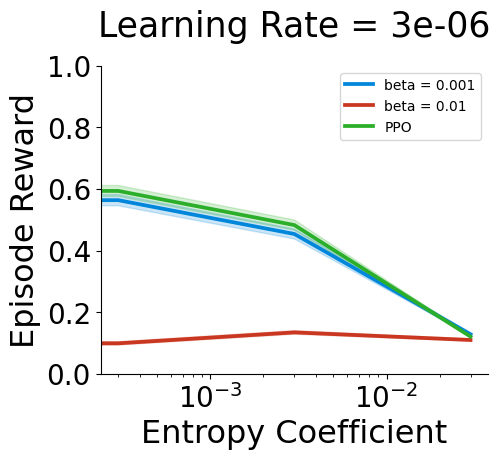

('minigrid-door-key-stochastic', 3e-05)
3e-05


/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/351259519.py:48: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, )


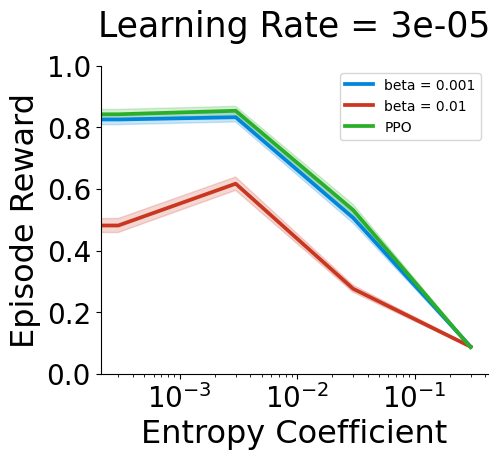

('minigrid-door-key-stochastic', 0.0003)
0.0003


/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/351259519.py:48: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, )


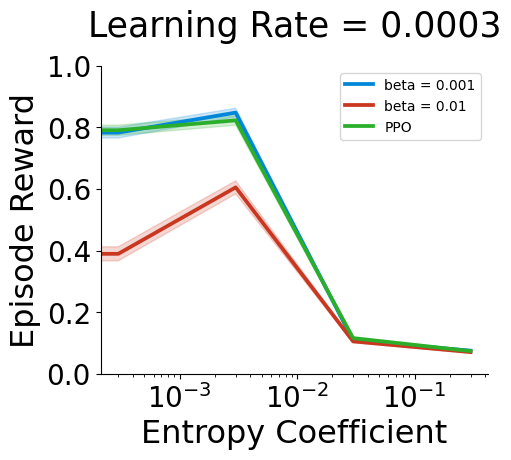

('minigrid-door-key-stochastic', 0.003)
0.003


/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/351259519.py:48: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, )


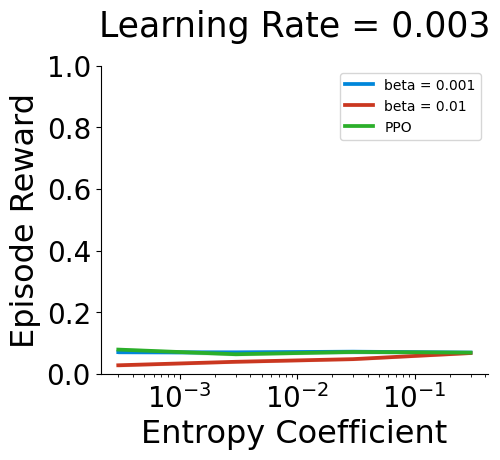

In [409]:
label_map = {0.0: "PPO", 0.001: "beta = 0.001", 0.01: "beta = 0.01"}
agg_func_const = 0.01
determ_env_df = average_df
determ_env_df = determ_env_df.dropna()
determ_env_df = determ_env_df[determ_env_df['beta'].isin([0.0, 0.001, 0.01])]
determ_env_df = determ_env_df[determ_env_df['agg_func_const'].isin([agg_func_const])
                              | (determ_env_df['agg_func_const'].isin([0.0]) & determ_env_df['beta'].isin([0.0]))]


set_matplotlib_style(style='4-row')
determ_env_df = determ_env_df[determ_env_df['count']]
# determ_env_df = determ_env_df['beta'].isin([0.0, 0.001])


for env_name, group in determ_env_df.groupby(['env_name', 'learning_rate']):
  print(env_name)
  learning_rate = env_name[1]
  print(learning_rate)
  env_name = env_name[0]

  group['beta_label'] = group['beta'].map(label_map)
  hue_labels = group['beta'].apply(lambda x: f'beta = {x}')

  
  max_step = group['step'].max()
  if 'crossing' in env_name.lower():
    max_step = int(8e5)
  elif 'key' in env_name.lower():
    max_step = int(7e5)
  rl_start_step = group.iloc[0]['rl_start_step']

  len_classes = len(group.groupby(['beta']).nunique())
  color_palette = get_color_palette(n=len_classes)
  sns.lineplot(
    group, x='ppo_entropy_coef', y='ep_reward', hue='beta_label',
    errorbar=t_distrib, palette=color_palette)
  
#   plt.axvline(x=rl_start_step, color='black', linestyle='--', alpha=0.3, linewidth=2)
  
  # plt.title(f'{standardize_env_name(env_name)}')
  plt.title("Learning Rate = " + str(learning_rate))
  # set_fig_labels('Time Steps', 'Episode Length', xsci=True)
  plt.xscale('log')

  max_y = group['ep_reward'].max()
  max_y = int(np.ceil(max_y / 100)) * 100
  plt.ylim(0, 1)
  plt.xlim(0, )

  plt.ylabel("Episode Reward")
  plt.xlabel("Entropy Coefficient")
   
  plt.legend(loc='upper right')



  # save_fig_versions(f'{standardize_env_name(env_name)}_delayed_rl_ep_len', type='png',dir='../../../figures/png')
  plt.show()

## Aggregate Function Coefficient

('minigrid-door-key-stochastic', 3e-05, 0.0)
           step    ep_length  ep_reward        reward   entropy ae_model_type  \
314483   500000  1000.000000   0.000000  1.315801e-07  0.000000         vqvae   
314484   510000  1000.000000   0.000000  2.520462e-04  3.921458         vqvae   
314485   520000  1000.000000   0.000000  1.244507e-04  4.267527         vqvae   
314486   530000   982.818182   0.024555  1.330977e-04  4.296991         vqvae   
314487   540000   934.100000   0.079310  1.686112e-04  4.357056         vqvae   
...         ...          ...        ...           ...       ...           ...   
352729   960000    19.001912   0.982898  5.140558e-02  4.136189         vqvae   
352730   970000    19.355769   0.982580  5.109415e-02  4.131196         vqvae   
352731   980000    19.244701   0.982680  5.100108e-02  4.124681         vqvae   
352732   990000    18.772983   0.983104  5.239946e-02  4.119158         vqvae   
352733  1000000    18.493530   0.983356  5.319955e-02  4.111951 

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/3079173560.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


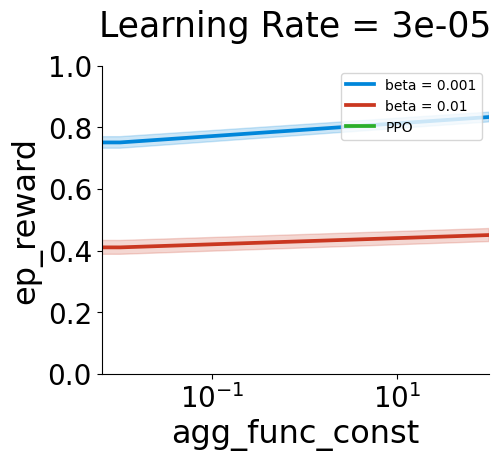

In [411]:
label_map = {0.0: "PPO", 0.001: "beta = 0.001", 0.01: "beta = 0.01"}

determ_env_df = average_df
determ_env_df = determ_env_df.dropna()
determ_env_df = determ_env_df[determ_env_df['beta'].isin([0.0, 0.001, 0.01])]
determ_env_df = determ_env_df[determ_env_df['ppo_entropy_coef'].isin([0.0])]
determ_env_df = determ_env_df[determ_env_df['learning_rate'].isin([0.00003])]





set_matplotlib_style(style='4-row')
determ_env_df = determ_env_df[determ_env_df['count']]
# determ_env_df = determ_env_df['beta'].isin([0.0, 0.001])


for env_name, group in determ_env_df.groupby(['env_name', 'learning_rate', 'ppo_entropy_coef']):
  print(env_name)
  learning_rate = env_name[1]
  env_name = env_name[0]
  print(group)

  group['beta_label'] = group['beta'].map(label_map)
  hue_labels = group['beta'].apply(lambda x: f'beta = {x}')

  
  max_step = group['step'].max()
  if 'crossing' in env_name.lower():
    max_step = int(8e5)
  elif 'key' in env_name.lower():
    max_step = int(7e5)
  rl_start_step = group.iloc[0]['rl_start_step']

  len_classes = len(group.groupby(['beta']).nunique())
  color_palette = get_color_palette(n=len_classes)
  sns.lineplot(
    group, x='agg_func_const', y='ep_reward', hue='beta_label',
    errorbar=t_distrib, palette=color_palette)
    
  # plt.title(f'{standardize_env_name(env_name)}')
  plt.title("Learning Rate = " + str(learning_rate))



  max_y = group['ep_reward'].max()
  max_y = int(np.ceil(max_y / 100)) * 100

  plt.xscale('log')


  plt.ylim(0, 1)
  plt.xlim(0, 100)

  plt.legend(loc='upper right')


  # save_fig_versions(f'{standardize_env_name(env_name)}_delayed_rl_ep_len', type='png',dir='../../../figures/png')
  plt.show()

In [383]:
params = ['ae_model_type', 'ae_recon_loss',	'beta',	'codebook_size', 'count', 'env_name', 'filter_size', 
          'learning_rate', 'rl_start_step', 'Model Type', 'ppo_entropy_coef', 'agg_func_const']


determ_env_df = average_df
determ_env_df = determ_env_df.dropna()
determ_env_df = determ_env_df[determ_env_df['beta'].isin([0.0, 0.001, 0.01])]
determ_env_df = determ_env_df[determ_env_df['learning_rate'].isin([0.00003])]
determ_env_df = determ_env_df[determ_env_df['ppo_entropy_coef'].isin([0.0])]


determ_env_df = determ_env_df.drop(columns=['experiment_key'])
determ_env_df = determ_env_df.groupby(params).mean()
determ_env_df

step  \
ae_model_type ae_recon_loss beta  codebook_size count env_name                     filter_size learning_rate rl_start_step Model Type ppo_entropy_coef agg_func_const             
vqvae         True          0.000 256           True  minigrid-door-key-stochastic 6           0.00003       500000        Discrete   0.0              0.00            750000.0   
                            0.001 256           True  minigrid-door-key-stochastic 6           0.00003       500000        Discrete   0.0              0.00            750000.0   
                                                                                                                                                       0.01            750000.0   
                                                                                                                                                       100.00          750000.0   
                            0.010 256           True  minigrid-door-key-stochastic 6           0.00003       500000        Discrete   0.0              0.00            750000.0   
                                                                                                                                                       0.01            750000.0   
                                                                                                                                                       100.00          750000.0   

                                                                                                                                                                        ep_length  \
ae_model_type ae_recon_loss beta  codebook_size count env_name                     filter_size learning_rate rl_start_step Model Type ppo_entropy_coef agg_func_const               
vqvae         True          0.000 256           True  minigrid-door-key-stochastic 6           0.00003       500000        Discrete   0.0              0.00            390.047469   
                            0.001 256           True  minigrid-door-key-stochastic 6           0.00003       500000        Discrete   0.0              0.00            231.873128   
                                                                                                                                                       0.01            255.720304   
                                                                                                                                                       100.00          172.333347   
                            0.010 256           True  minigrid-door-key-stochastic 6           0.00003       500000        Discrete   0.0              0.00            289.066588   
                                                                                                                                                       0.01            598.110236   
                                                                                                                                                       100.00          560.729226   

                                                                                                                                                                       ep_reward  \
ae_model_type ae_recon_loss beta  codebook_size count env_name                     filter_size learning_rate rl_start_step Model Type ppo_entropy_coef agg_func_const              
vqvae         True          0.000 256           True  minigrid-door-key-stochastic 6           0.00003       500000        Discrete   0.0              0.00             0.615761   
                            0.001 256           True  minigrid-door-key-stochastic 6           0.00003       500000        Discrete   0.0              0.00             0.774313   
                                                                                                                                                       0.01             0.751248   
                             

In [384]:
determ_env_df 
determ_env_df = determ_env_df.dropna()
determ_env_df = determ_env_df[determ_env_df['beta'].isin([0.0, 0.001, 0.01])]
determ_env_df = determ_env_df[determ_env_df['learning_rate'].isin([0.00003])]
determ_env_df = determ_env_df[determ_env_df['ppo_entropy_coef'].isin([0.0])]


determ_env_df

KeyError: 'beta'

In [ ]:
params = ['ae_model_type', 'ae_recon_loss',	'beta',	'codebook_size', 'count', 'env_name', 'filter_size', 
          'learning_rate', 'rl_start_step', 'Model Type', 'ppo_entropy_coef', 'agg_func_const']

     ae_model_type  ae_recon_loss  beta  codebook_size  count  \
120          vqvae           True  0.00            256   True   
121          vqvae           True  0.00            256   True   
122          vqvae           True  0.00            256   True   
123          vqvae           True  0.00            256   True   
124          vqvae           True  0.00            256   True   
...            ...            ...   ...            ...    ...   
2508         vqvae           True  0.01            256   True   
2509         vqvae           True  0.01            256   True   
2510         vqvae           True  0.01            256   True   
2511         vqvae           True  0.01            256   True   
2512         vqvae           True  0.01            256   True   

                          env_name  filter_size  learning_rate  rl_start_step  \
120   minigrid-door-key-stochastic            6        0.00003         500000   
121   minigrid-door-key-stochastic            6        0.

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/627028457.py:54: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


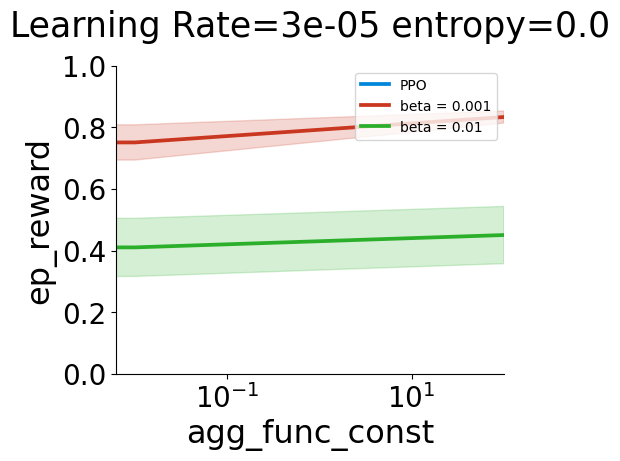

In [ ]:
label_map = {0.0: "PPO", 0.001: "beta = 0.001", 0.01: "beta = 0.01"}
# label_map = {0.3: "c2 = 0.3", 0.03: "c2 = 0.03", 0.003: "c2 = 0.003", 0.0003: "c2=0.0003"}

determ_env_df = average_df.drop(columns=['experiment_key'])
determ_env_df = determ_env_df.dropna()
determ_env_df = determ_env_df[determ_env_df['beta'].isin([0.0, 0.001, 0.01])]
determ_env_df = determ_env_df[determ_env_df['learning_rate'].isin([0.00003])]
determ_env_df = determ_env_df[determ_env_df['ppo_entropy_coef'].isin([0.0])]


print(determ_env_df)


set_matplotlib_style(style='4-row')
determ_env_df = determ_env_df[determ_env_df['count']]


for env_name, group in determ_env_df.groupby(['env_name', 'learning_rate', 'ppo_entropy_coef']):
  print(env_name)
  learning_rate = env_name[1]
  beta = env_name[2]
  env_name = env_name[0]
  print(group)

  group['beta_label'] = group['beta'].map(label_map)
  hue_labels = group['beta'].apply(lambda x: f'{x}')

  
  max_step = group['step'].max()
  if 'crossing' in env_name.lower():
    max_step = int(8e5)
  elif 'key' in env_name.lower():
    max_step = int(7e5)
  rl_start_step = group.iloc[0]['rl_start_step']

  len_classes = len(group.groupby(['beta']).nunique())
  color_palette = get_color_palette(n=len_classes)
  sns.lineplot(
    group, x='agg_func_const', y='ep_reward', hue='beta_label',
    errorbar=t_distrib, palette=color_palette)
    
  # plt.title(f'{standardize_env_name(env_name)}')
  plt.title("Learning Rate=" + str(learning_rate) + " entropy="+ str(beta))



  max_y = group['ep_reward'].max()
  max_y = int(np.ceil(max_y / 100)) * 100

  plt.xscale('log')


  plt.ylim(0, 1)
  plt.xlim(0, 100)

  plt.legend(loc='upper right')


  # save_fig_versions(f'{standardize_env_name(env_name)}_delayed_rl_ep_len', type='png',dir='../../../figures/png')
  plt.show()

# Difficult Minigrid

In [ ]:
data_path = 'data/model-free-minigrid-short-all-params_data.csv'
df = pd.read_csv(data_path, index_col=0)
df['Model Type'] = df['ae_model_type']


model_type_map = {
  'ae': 'Continuous',
  'vqvae': 'Discrete',
  'fta_ae': 'FTA',
  'softmax_ae': 'Softmax AE',
}
df['Model Type'] = df['Model Type'].apply(lambda x: model_type_map[x])
df['Model Type'] = df.apply(
  (lambda x: x['Model Type'] if x['ae_recon_loss'] else 'End-to-End'), axis=1)

# Remove all softmax
df = df[df['ae_model_type'] != 'softmax_ae']
df

,step,ep_length,ep_reward,reward,entropy,ae_model_type,ae_recon_loss,agg_func_const,beta,codebook_size,count,env_name,filter_size,learning_rate,ppo_entropy_coef,rl_start_step,experiment_key,Model Type
0,10000,100.0,0.0,0.0,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,0.0003,500000,ddd988ae68cc421f9523abd0439361a9,Discrete
1,20000,100.0,0.0,0.0,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,0.0003,500000,ddd988ae68cc421f9523abd0439361a9,Discrete
2,30000,100.0,0.0,0.0,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,0.0003,500000,ddd988ae68cc421f9523abd0439361a9,Discrete
3,40000,100.0,0.0,0.0,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,0.0003,500000,ddd988ae68cc421f9523abd0439361a9,Discrete
4,50000,100.0,0.0,0.0,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,0.0003,500000,ddd988ae68cc421f9523abd0439361a9,Discrete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560213,1460000,100.0,0.0,0.0,3.123842,vqvae,True,0.0,0.000,256,True,minigrid-door-key-stochastic,6,0.00030,0.0000,500000,33557e6e9e5c46ea84e6abc2b3f957fd,Discrete
560214,1470000,100.0,0.0,0.0,3.122090,vqvae,True,0.0,0.000,256,True,minigrid-door-key-stochastic,6,0.00030,0.0000,500000,33557e6e9e5c46ea84e6abc2b3f957fd,Discrete
560215,1480000,100.0,0.0,0.0,3.117087,vqvae,True,0.0,0.000,256,True,minigrid-door-key-stochastic,6,0.00030,0.0000,500000,33557e6e9e5c46ea84e6abc2b3f957fd,Discrete
560216,1490000,100.0,0.0,0.0,3.111155,vqvae,True,0.0,0.000,256,True,minigrid-door-key-stochastic,6,0.00030,0.0000,500000,33557e6e9e5c46ea84e6abc2b3f957fd,Discrete


In [ ]:
# df = df.drop('experiment_key', axis=1)
params = ['ae_model_type', 'ae_recon_loss',	'beta',	'codebook_size', 'count', 'env_name', 'filter_size', 
          'learning_rate', 'rl_start_step', 'Model Type', 'ppo_entropy_coef', 'agg_func_const', 'experiment_key']

df = df[df['step'] >= 500000]

average_df = df.groupby(params, as_index=False).mean()

average_df

,ae_model_type,ae_recon_loss,beta,codebook_size,count,env_name,filter_size,learning_rate,rl_start_step,Model Type,ppo_entropy_coef,agg_func_const,experiment_key,step,ep_length,ep_reward,reward,entropy
0,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.000003,500000,Discrete,0.0,0.0,0772216c49944911a3b551a4fcfae600,1000000.0,87.798423,0.127944,2.799503e-03,3.902903
1,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.000003,500000,Discrete,0.0,0.0,08813fe74dfa4ca59b350e01eb9b0e46,1000000.0,99.996832,0.000048,4.831683e-07,3.708907
2,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.000003,500000,Discrete,0.0,0.0,16ed159f3aab48729966a7ab3cf544eb,1000000.0,92.186554,0.082971,1.582051e-03,3.696772
3,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.000003,500000,Discrete,0.0,0.0,1b9ae676bb8c4cfea6a37473301cda4b,1000000.0,66.582166,0.346312,1.268185e-02,3.871579
4,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.000003,500000,Discrete,0.0,0.0,20dad4ef812d45489580c3f2e9f5ac25,1000000.0,99.986572,0.000210,2.102970e-06,3.601913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.003000,500000,Discrete,0.3,100.0,c3c846dd15e14ea1bb5821a287624a4e,1000000.0,99.992277,0.000109,2.352141e-04,2.275780
3819,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.003000,500000,Discrete,0.3,100.0,ca7be641d77a4ebb8212f15450c28714,965000.0,99.989278,0.000150,3.530647e-03,2.286141
3820,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.003000,500000,Discrete,0.3,100.0,d4231854cd4648498bff7493eb3f79d4,1000000.0,99.997525,0.000052,2.346423e-04,2.282527
3821,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.003000,500000,Discrete,0.3,100.0,e96c9c03059c4bdc9f9ed761b9da778c,1000000.0,99.993861,0.000115,2.352717e-04,2.284943


('minigrid-door-key-stochastic', 3e-06)
3e-06


/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/2743528758.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, )


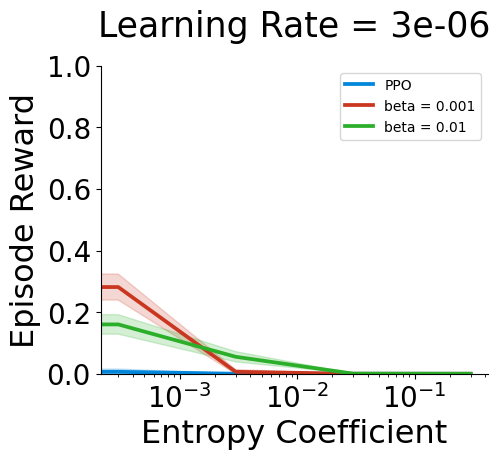

('minigrid-door-key-stochastic', 3e-05)
3e-05


/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/2743528758.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, )


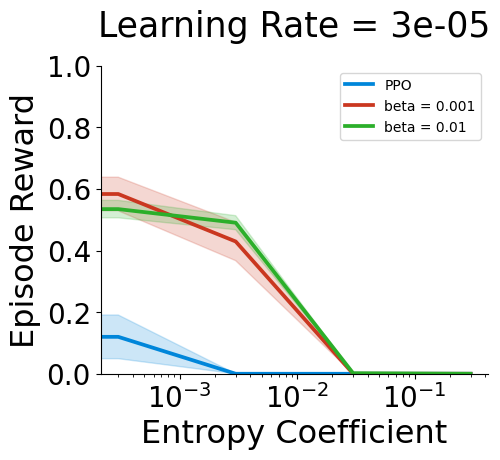

('minigrid-door-key-stochastic', 0.0003)
0.0003


/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/2743528758.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, )


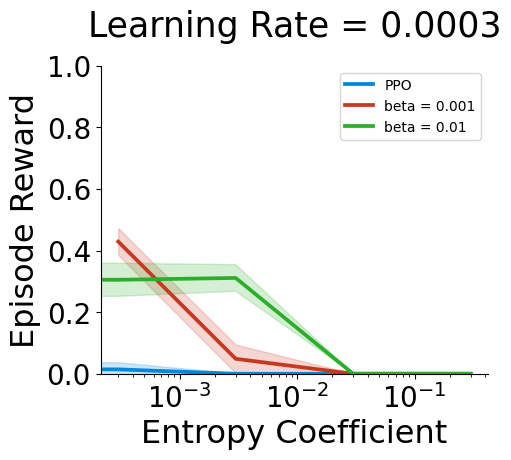

('minigrid-door-key-stochastic', 0.003)
0.003


/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/2743528758.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, )


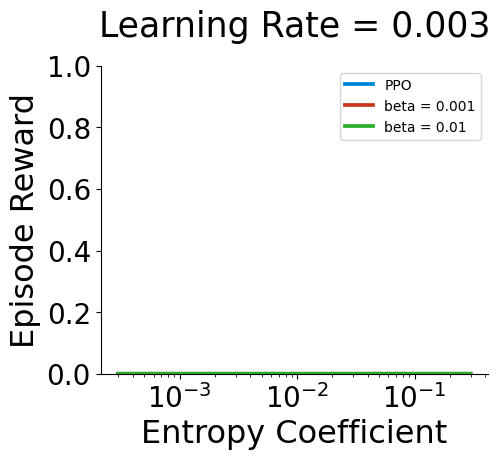

In [ ]:
label_map = {0.0: "PPO", 0.001: "beta = 0.001", 0.01: "beta = 0.01"}

determ_env_df = average_df
agg_func_const = 100
determ_env_df = determ_env_df.dropna()
determ_env_df = determ_env_df[determ_env_df['beta'].isin([0.0, 0.001, 0.0001, 0.01])]
determ_env_df = determ_env_df[determ_env_df['agg_func_const'].isin([agg_func_const]) |
                               (determ_env_df['agg_func_const'].isin([0.0]) & determ_env_df['beta'].isin([0.0]))]


set_matplotlib_style(style='4-row')
determ_env_df = determ_env_df[determ_env_df['count']]
# determ_env_df = determ_env_df['beta'].isin([0.0, 0.001])


for env_name, group in determ_env_df.groupby(['env_name', 'learning_rate']):
  print(env_name)
  learning_rate = env_name[1]
  print(learning_rate)
  env_name = env_name[0]

  group['beta_label'] = group['beta'].map(label_map)
  hue_labels = group['beta'].apply(lambda x: f'beta = {x}')

  
  max_step = group['step'].max()
  if 'crossing' in env_name.lower():
    max_step = int(8e5)
  elif 'key' in env_name.lower():
    max_step = int(7e5)
  rl_start_step = group.iloc[0]['rl_start_step']

  len_classes = len(group.groupby(['beta']).nunique())
  color_palette = get_color_palette(n=len_classes)
  sns.lineplot(
    group, x='ppo_entropy_coef', y='ep_reward', hue='beta_label',
    errorbar=t_distrib, palette=color_palette)
  
#   plt.axvline(x=rl_start_step, color='black', linestyle='--', alpha=0.3, linewidth=2)
  
  # plt.title(f'{standardize_env_name(env_name)}')
  plt.title("Learning Rate = " + str(learning_rate))
  # set_fig_labels('Time Steps', 'Episode Length', xsci=True)
  plt.xscale('log')

  max_y = group['ep_reward'].max()
  max_y = int(np.ceil(max_y / 100)) * 100
  plt.ylim(0, 1)
  plt.xlim(0, )

  plt.ylabel("Episode Reward")
  plt.xlabel("Entropy Coefficient")
   
  plt.legend(loc='upper right')



  # save_fig_versions(f'{standardize_env_name(env_name)}_delayed_rl_ep_len', type='png',dir='../../../figures/png')
  plt.show()

('minigrid-door-key-stochastic', 3e-05, 0.0)
    ae_model_type  ae_recon_loss  beta  codebook_size  count  \
0           vqvae           True   0.0            256   True   
1           vqvae           True   0.0            256   True   
2           vqvae           True   0.0            256   True   
3           vqvae           True   0.0            256   True   
4           vqvae           True   0.0            256   True   
..            ...            ...   ...            ...    ...   
110         vqvae           True   0.0            256   True   
111         vqvae           True   0.0            256   True   
112         vqvae           True   0.0            256   True   
113         vqvae           True   0.0            256   True   
114         vqvae           True   0.0            256   True   

                         env_name  filter_size  learning_rate  rl_start_step  \
0    minigrid-door-key-stochastic            6        0.00003         500000   
1    minigrid-door-key-sto

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:49: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log')
/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


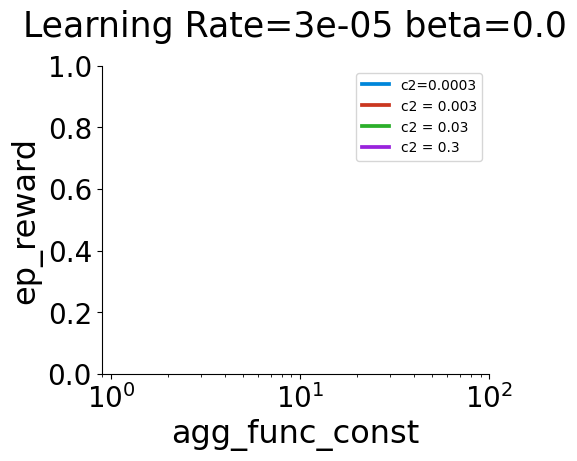

('minigrid-door-key-stochastic', 3e-05, 0.001)
    ae_model_type  ae_recon_loss   beta  codebook_size  count  \
355         vqvae           True  0.001            256   True   
356         vqvae           True  0.001            256   True   
357         vqvae           True  0.001            256   True   
358         vqvae           True  0.001            256   True   
359         vqvae           True  0.001            256   True   
..            ...            ...    ...            ...    ...   
697         vqvae           True  0.001            256   True   
698         vqvae           True  0.001            256   True   
699         vqvae           True  0.001            256   True   
700         vqvae           True  0.001            256   True   
701         vqvae           True  0.001            256   True   

                         env_name  filter_size  learning_rate  rl_start_step  \
355  minigrid-door-key-stochastic            6        0.00003         500000   
356  minigri

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


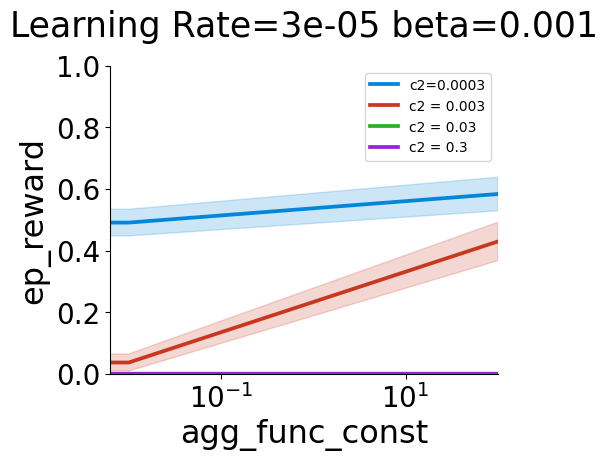

('minigrid-door-key-stochastic', 3e-05, 0.01)
     ae_model_type  ae_recon_loss  beta  codebook_size  count  \
1406         vqvae           True  0.01            256   True   
1407         vqvae           True  0.01            256   True   
1408         vqvae           True  0.01            256   True   
1409         vqvae           True  0.01            256   True   
1410         vqvae           True  0.01            256   True   
...            ...            ...   ...            ...    ...   
1742         vqvae           True  0.01            256   True   
1743         vqvae           True  0.01            256   True   
1744         vqvae           True  0.01            256   True   
1745         vqvae           True  0.01            256   True   
1746         vqvae           True  0.01            256   True   

                          env_name  filter_size  learning_rate  rl_start_step  \
1406  minigrid-door-key-stochastic            6        0.00003         500000   
1407  minig

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


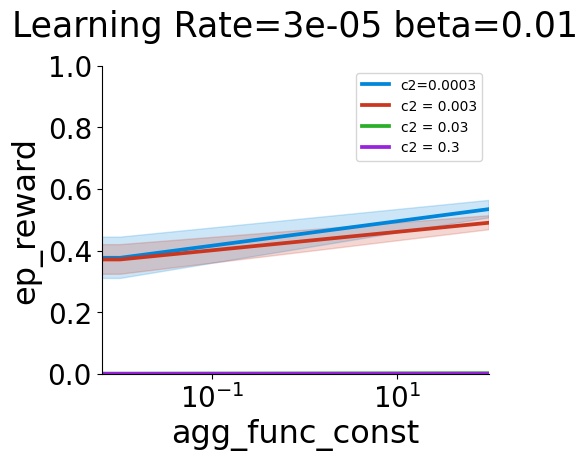

('minigrid-door-key-stochastic', 0.0003, 0.0)
    ae_model_type  ae_recon_loss  beta  codebook_size  count  \
115         vqvae           True   0.0            256   True   
116         vqvae           True   0.0            256   True   
117         vqvae           True   0.0            256   True   
118         vqvae           True   0.0            256   True   
119         vqvae           True   0.0            256   True   
..            ...            ...   ...            ...    ...   
230         vqvae           True   0.0            256   True   
231         vqvae           True   0.0            256   True   
232         vqvae           True   0.0            256   True   
233         vqvae           True   0.0            256   True   
234         vqvae           True   0.0            256   True   

                         env_name  filter_size  learning_rate  rl_start_step  \
115  minigrid-door-key-stochastic            6         0.0003         500000   
116  minigrid-door-key-st

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:49: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log')
/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


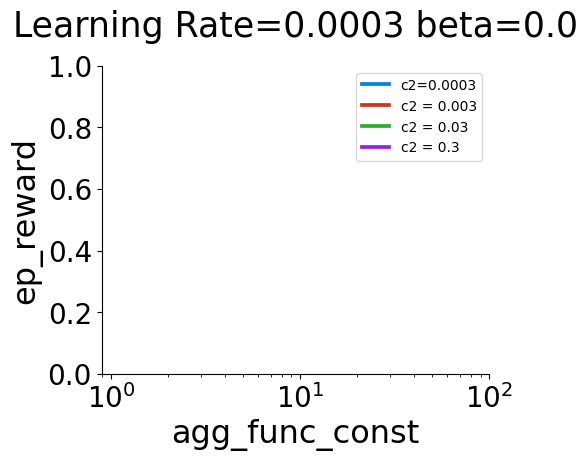

('minigrid-door-key-stochastic', 0.0003, 0.001)
     ae_model_type  ae_recon_loss   beta  codebook_size  count  \
702          vqvae           True  0.001            256   True   
703          vqvae           True  0.001            256   True   
704          vqvae           True  0.001            256   True   
705          vqvae           True  0.001            256   True   
706          vqvae           True  0.001            256   True   
...            ...            ...    ...            ...    ...   
1049         vqvae           True  0.001            256   True   
1050         vqvae           True  0.001            256   True   
1051         vqvae           True  0.001            256   True   
1052         vqvae           True  0.001            256   True   
1053         vqvae           True  0.001            256   True   

                          env_name  filter_size  learning_rate  rl_start_step  \
702   minigrid-door-key-stochastic            6         0.0003         500000 

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


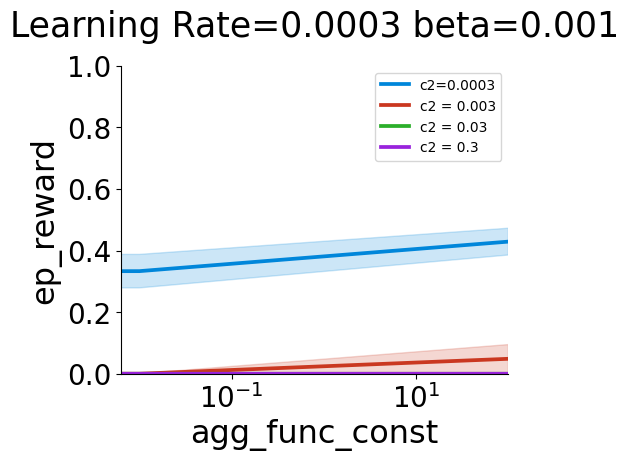

('minigrid-door-key-stochastic', 0.0003, 0.01)
     ae_model_type  ae_recon_loss  beta  codebook_size  count  \
1747         vqvae           True  0.01            256   True   
1748         vqvae           True  0.01            256   True   
1749         vqvae           True  0.01            256   True   
1750         vqvae           True  0.01            256   True   
1751         vqvae           True  0.01            256   True   
...            ...            ...   ...            ...    ...   
2093         vqvae           True  0.01            256   True   
2094         vqvae           True  0.01            256   True   
2095         vqvae           True  0.01            256   True   
2096         vqvae           True  0.01            256   True   
2097         vqvae           True  0.01            256   True   

                          env_name  filter_size  learning_rate  rl_start_step  \
1747  minigrid-door-key-stochastic            6         0.0003         500000   
1748  mini

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


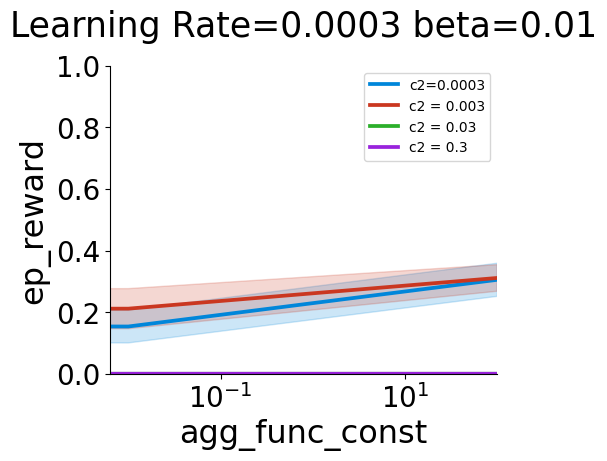

('minigrid-door-key-stochastic', 0.003, 0.0)
    ae_model_type  ae_recon_loss  beta  codebook_size  count  \
235         vqvae           True   0.0            256   True   
236         vqvae           True   0.0            256   True   
237         vqvae           True   0.0            256   True   
238         vqvae           True   0.0            256   True   
239         vqvae           True   0.0            256   True   
..            ...            ...   ...            ...    ...   
350         vqvae           True   0.0            256   True   
351         vqvae           True   0.0            256   True   
352         vqvae           True   0.0            256   True   
353         vqvae           True   0.0            256   True   
354         vqvae           True   0.0            256   True   

                         env_name  filter_size  learning_rate  rl_start_step  \
235  minigrid-door-key-stochastic            6          0.003         500000   
236  minigrid-door-key-sto

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:49: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log')
/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


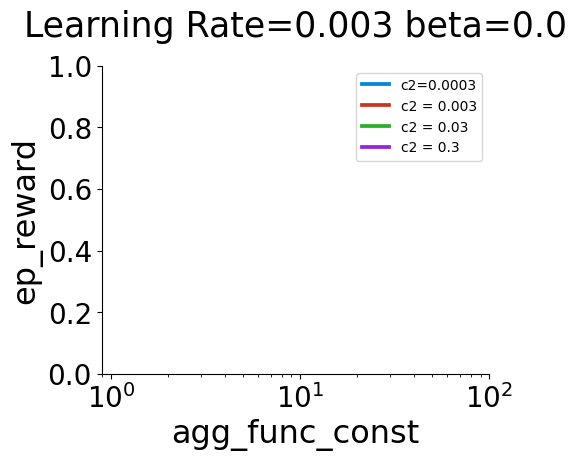

('minigrid-door-key-stochastic', 0.003, 0.001)
     ae_model_type  ae_recon_loss   beta  codebook_size  count  \
1054         vqvae           True  0.001            256   True   
1055         vqvae           True  0.001            256   True   
1056         vqvae           True  0.001            256   True   
1057         vqvae           True  0.001            256   True   
1058         vqvae           True  0.001            256   True   
...            ...            ...    ...            ...    ...   
1401         vqvae           True  0.001            256   True   
1402         vqvae           True  0.001            256   True   
1403         vqvae           True  0.001            256   True   
1404         vqvae           True  0.001            256   True   
1405         vqvae           True  0.001            256   True   

                          env_name  filter_size  learning_rate  rl_start_step  \
1054  minigrid-door-key-stochastic            6          0.003         500000  

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


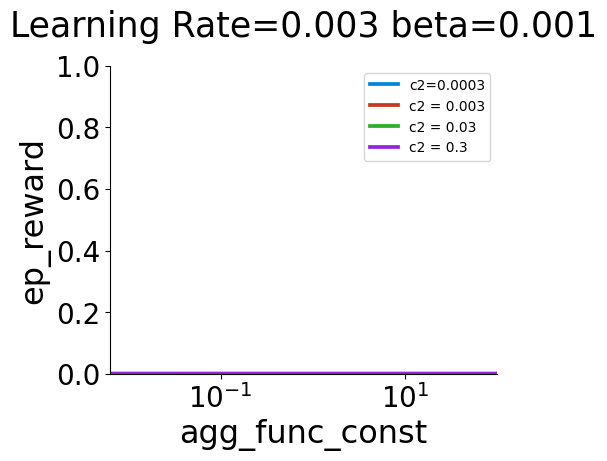

('minigrid-door-key-stochastic', 0.003, 0.01)
     ae_model_type  ae_recon_loss  beta  codebook_size  count  \
2098         vqvae           True  0.01            256   True   
2099         vqvae           True  0.01            256   True   
2100         vqvae           True  0.01            256   True   
2101         vqvae           True  0.01            256   True   
2102         vqvae           True  0.01            256   True   
...            ...            ...   ...            ...    ...   
2441         vqvae           True  0.01            256   True   
2442         vqvae           True  0.01            256   True   
2443         vqvae           True  0.01            256   True   
2444         vqvae           True  0.01            256   True   
2445         vqvae           True  0.01            256   True   

                          env_name  filter_size  learning_rate  rl_start_step  \
2098  minigrid-door-key-stochastic            6          0.003         500000   
2099  minig

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1385894937.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


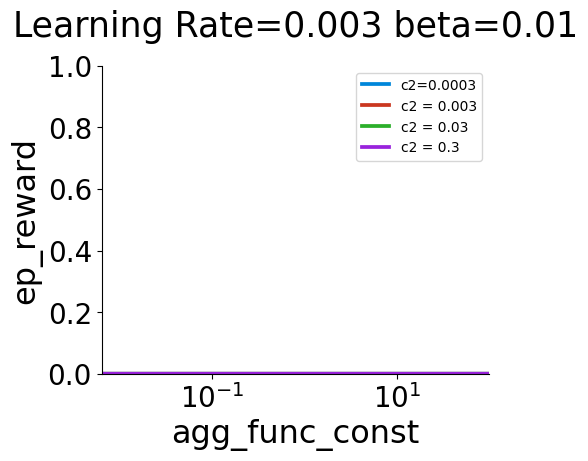

In [ ]:
label_map = {0.0: "PPO", 0.001: "beta = 0.001", 0.01: "beta = 0.01"}
label_map = {0.3: "c2 = 0.3", 0.03: "c2 = 0.03", 0.003: "c2 = 0.003", 0.0003: "c2=0.0003"}

determ_env_df = average_df
determ_env_df = determ_env_df.dropna()
determ_env_df = determ_env_df[determ_env_df['beta'].isin([0.0, 0.001, 0.01])]
# determ_env_df = determ_env_df[determ_env_df['ppo_entropy_coef'].isin([0.0003])]




set_matplotlib_style(style='4-row')
determ_env_df = determ_env_df[determ_env_df['count']]
# determ_env_df = determ_env_df['beta'].isin([0.0, 0.001])


for env_name, group in determ_env_df.groupby(['env_name', 'learning_rate', 'beta']):
  print(env_name)
  learning_rate = env_name[1]
  beta = env_name[2]
  env_name = env_name[0]
  print(group)

  group['entropy_label'] = group['ppo_entropy_coef'].map(label_map)
  hue_labels = group['entropy'].apply(lambda x: f'{x}')

  
  max_step = group['step'].max()
  if 'crossing' in env_name.lower():
    max_step = int(8e5)
  elif 'key' in env_name.lower():
    max_step = int(7e5)
  rl_start_step = group.iloc[0]['rl_start_step']

  len_classes = len(group.groupby(['ppo_entropy_coef']).nunique())
  color_palette = get_color_palette(n=len_classes)
  sns.lineplot(
    group, x='agg_func_const', y='ep_reward', hue='entropy_label',
    errorbar=t_distrib, palette=color_palette)
    
  # plt.title(f'{standardize_env_name(env_name)}')
  plt.title("Learning Rate=" + str(learning_rate) + " beta="+ str(beta))



  max_y = group['ep_reward'].max()
  max_y = int(np.ceil(max_y / 100)) * 100

  plt.xscale('log')


  plt.ylim(0, 1)
  plt.xlim(0, 100)

  plt.legend(loc='upper right')


  # save_fig_versions(f'{standardize_env_name(env_name)}_delayed_rl_ep_len', type='png',dir='../../../figures/png')
  plt.show()

In [ ]:
data_path = 'data/model-free-minigrid-short-all-params_data.csv'
df = pd.read_csv(data_path, index_col=0)
df['Model Type'] = df['ae_model_type']


model_type_map = {
  'ae': 'Continuous',
  'vqvae': 'Discrete',
  'fta_ae': 'FTA',
  'softmax_ae': 'Softmax AE',
}
df['Model Type'] = df['Model Type'].apply(lambda x: model_type_map[x])
df['Model Type'] = df.apply(
  (lambda x: x['Model Type'] if x['ae_recon_loss'] else 'End-to-End'), axis=1)

# Remove all softmax
df = df[df['ae_model_type'] != 'softmax_ae']

df

,step,ep_length,ep_reward,reward,entropy,ae_model_type,ae_recon_loss,agg_func_const,beta,codebook_size,count,env_name,filter_size,learning_rate,ppo_entropy_coef,rl_start_step,experiment_key,Model Type
0,10000,100.0,0.0,0.0,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,0.0003,500000,ddd988ae68cc421f9523abd0439361a9,Discrete
1,20000,100.0,0.0,0.0,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,0.0003,500000,ddd988ae68cc421f9523abd0439361a9,Discrete
2,30000,100.0,0.0,0.0,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,0.0003,500000,ddd988ae68cc421f9523abd0439361a9,Discrete
3,40000,100.0,0.0,0.0,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,0.0003,500000,ddd988ae68cc421f9523abd0439361a9,Discrete
4,50000,100.0,0.0,0.0,0.000000,vqvae,True,0.0,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,0.0003,500000,ddd988ae68cc421f9523abd0439361a9,Discrete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353763,1460000,100.0,0.0,0.0,2.256366,vqvae,True,0.0,0.000,256,True,minigrid-door-key-stochastic,6,0.00300,0.3000,500000,d4a9d92c1c854f52a5f0447e6151e729,Discrete
353764,1470000,100.0,0.0,0.0,2.224241,vqvae,True,0.0,0.000,256,True,minigrid-door-key-stochastic,6,0.00300,0.3000,500000,d4a9d92c1c854f52a5f0447e6151e729,Discrete
353765,1480000,100.0,0.0,0.0,2.228110,vqvae,True,0.0,0.000,256,True,minigrid-door-key-stochastic,6,0.00300,0.3000,500000,d4a9d92c1c854f52a5f0447e6151e729,Discrete
353766,1490000,100.0,0.0,0.0,2.277240,vqvae,True,0.0,0.000,256,True,minigrid-door-key-stochastic,6,0.00300,0.3000,500000,d4a9d92c1c854f52a5f0447e6151e729,Discrete


           step   ep_length  ep_reward    reward   entropy ae_model_type  \
8655      10000  100.000000   0.000000  0.000000  0.000000         vqvae   
8656      20000  100.000000   0.000000  0.000000  0.000000         vqvae   
8657      30000  100.000000   0.000000  0.000000  0.000000         vqvae   
8658      40000  100.000000   0.000000  0.000000  0.000000         vqvae   
8659      50000  100.000000   0.000000  0.000000  0.000000         vqvae   
...         ...         ...        ...       ...       ...           ...   
163855  1460000   18.674766   0.831927  0.045140  2.680748         vqvae   
163856  1470000   18.806391   0.829803  0.044896  2.663662         vqvae   
163857  1480000   18.541744   0.832753  0.045497  2.680356         vqvae   
163858  1490000   18.240876   0.835832  0.046324  2.671894         vqvae   
163859  1500000   18.393382   0.834276  0.045979  2.679580         vqvae   

        ae_recon_loss  agg_func_const   beta  codebook_size  count  \
8655             

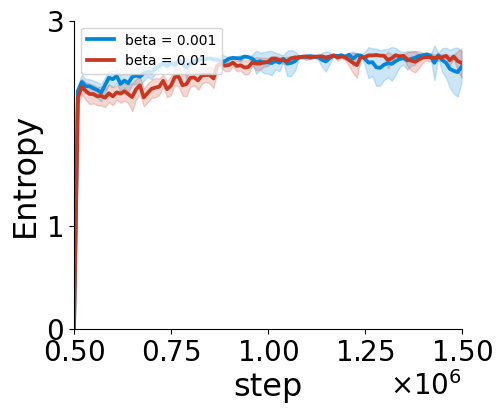

           step   ep_length  ep_reward    reward   entropy ae_model_type  \
20743     10000  100.000000   0.000000  0.000000  0.000000         vqvae   
20744     20000  100.000000   0.000000  0.000000  0.000000         vqvae   
20745     30000  100.000000   0.000000  0.000000  0.000000         vqvae   
20746     40000  100.000000   0.000000  0.000000  0.000000         vqvae   
20747     50000  100.000000   0.001000  0.000010  0.000000         vqvae   
...         ...         ...        ...       ...       ...           ...   
176626  1180000   22.884354   0.793587  0.036062  2.616502         vqvae   
176627  1190000   24.407317   0.780090  0.033091  2.600053         vqvae   
176628  1200000   24.730198   0.776686  0.032530  2.597790         vqvae   
176629  1210000   26.151832   0.764110  0.030312  2.604940         vqvae   
176630  1220000   26.414248   0.760161  0.030334  2.600125         vqvae   

        ae_recon_loss  agg_func_const   beta  codebook_size  count  \
20743            

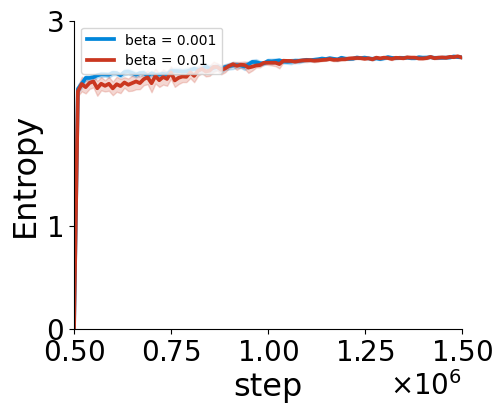

           step  ep_length  ep_reward    reward   entropy ae_model_type  \
33250     10000  100.00000   0.000000  0.000000  0.000000         vqvae   
33251     20000  100.00000   0.000000  0.000000  0.000000         vqvae   
33252     30000  100.00000   0.000000  0.000000  0.000000         vqvae   
33253     40000  100.00000   0.000000  0.000000  0.000000         vqvae   
33254     50000  100.00000   0.000000  0.000000  0.000000         vqvae   
...         ...        ...        ...       ...       ...           ...   
189743  1370000   99.45000   0.005950  0.001358  2.362397         vqvae   
189744  1380000   99.80198   0.003762  0.001786  2.404844         vqvae   
189745  1390000  100.00000   0.000000  0.001548  2.519963         vqvae   
189746  1400000   99.94000   0.001540  0.001843  2.496081         vqvae   
189747  1410000  100.00000   0.000000  0.001431  2.365974         vqvae   

        ae_recon_loss  agg_func_const   beta  codebook_size  count  \
33250            True        

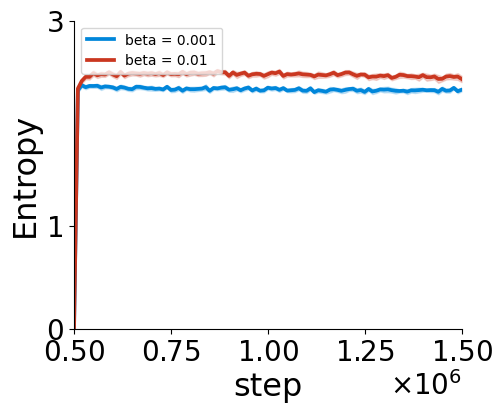

           step  ep_length  ep_reward    reward   entropy ae_model_type  \
46184     10000     100.00    0.00000  0.000000  0.000000         vqvae   
46185     20000     100.00    0.00000  0.000000  0.000000         vqvae   
46186     30000     100.00    0.00000  0.000000  0.000000         vqvae   
46187     40000     100.00    0.00000  0.000000  0.000000         vqvae   
46188     50000     100.00    0.00000  0.000000  0.000000         vqvae   
...         ...        ...        ...       ...       ...           ...   
200948  1460000      99.94    0.00154  0.001193  2.316155         vqvae   
200949  1470000     100.00    0.00000  0.001125  2.339687         vqvae   
200950  1480000     100.00    0.00000  0.001092  2.320781         vqvae   
200951  1490000     100.00    0.00000  0.001155  2.328779         vqvae   
200952  1500000     100.00    0.00000  0.001114  2.361764         vqvae   

        ae_recon_loss  agg_func_const   beta  codebook_size  count  \
46184            True        

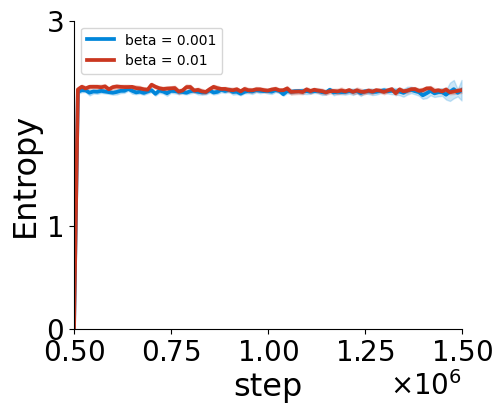

In [ ]:
label_map = {0.0: "PPO", 0.001: "beta = 0.001", 0.01: "beta = 0.01"}

determ_env_df = df[
  ~df['env_name'].str.contains('-rand') &
  (
    (
      (df['rl_start_step'] > 100000) &
      
      df['ae_recon_loss']
    ) |
    ~df['ae_recon_loss']
  ) &
  ((df['Model Type'] == 'Continuous') | (df['Model Type'] == 'Discrete'))
]
determ_env_df = determ_env_df.dropna()
determ_env_df = determ_env_df[determ_env_df['beta'].isin([0.0, 0.001, 0.01])]
determ_env_df = determ_env_df[determ_env_df['learning_rate'].isin([0.00003])]
determ_env_df = determ_env_df[determ_env_df['agg_func_const'].isin([100])]

set_matplotlib_style(style='4-row')


for env_name, group in determ_env_df.groupby(['env_name', 'ppo_entropy_coef']):
  env_name = env_name[0]
  ppo_entropy_coef = env_name[1]

  group['beta_label'] = group['beta'].map(label_map)
  hue_labels = group['beta'].apply(lambda x: f'beta = {x}')
  print(group)

  
  max_step = group['step'].max()
  if 'crossing' in env_name.lower():
    max_step = int(8e5)
  elif 'key' in env_name.lower():
    max_step = int(1.5e6)
  rl_start_step = group.iloc[0]['rl_start_step']

  print(group.groupby(['beta'])['experiment_key'].nunique())
  len_classes = len(group.groupby(['beta'])['experiment_key'].nunique())
  print(group.groupby(['beta'])['experiment_key'].nunique())
  color_palette = get_color_palette(n=len_classes)

  lines = sns.lineplot(
  group, x='step', y='entropy', hue='beta_label',
          errorbar=t_distrib, palette=color_palette).lines
  # plt.axvline(x=rl_start_step, color='black', linestyle='--', alpha=0.3, linewidth=2)

  
  # plt.title(f'{standardize_env_name(env_name)}')
  set_fig_labels('Time Steps', 'Entropy', xsci=True)
  plt.xlim(rl_start_step, max_step)
  
  max_y = 3
  plt.ylim(0, max_y)
  plt.gca().set_yticks([0, max_y // 2, max_y])
  plt.legend(loc='upper left')
  # plt.legend().remove()



#   save_fig_versions(f'{standardize_env_name(env_name)}', type='png',dir='../../../figures/png')
  plt.show()

# Aggregate function sensitivity


In [ ]:
data_path = 'data/model-free-minigrid-all-params_data.csv'
df = pd.read_csv(data_path, index_col=0)
df['Model Type'] = df['ae_model_type']


model_type_map = {
  'ae': 'Continuous',
  'vqvae': 'Discrete',
  'fta_ae': 'FTA',
  'softmax_ae': 'Softmax AE',
}
df['Model Type'] = df['Model Type'].apply(lambda x: model_type_map[x])
df['Model Type'] = df.apply(
  (lambda x: x['Model Type'] if x['ae_recon_loss'] else 'End-to-End'), axis=1)

# Remove all softmax
df = df[df['ae_model_type'] != 'softmax_ae']

In [ ]:
# df = df.drop('experiment_key', axis=1)
params = ['ae_model_type', 'ae_recon_loss',	'beta',	'codebook_size', 'count', 'env_name', 'filter_size', 
          'learning_rate', 'rl_start_step', 'Model Type', 'ppo_entropy_coef', 'agg_func_const', 'experiment_key']

df = df[df['step'] >= 500000]

average_df = df.groupby(params, as_index=False).mean()

average_df

,ae_model_type,ae_recon_loss,beta,codebook_size,count,env_name,filter_size,learning_rate,rl_start_step,Model Type,ppo_entropy_coef,agg_func_const,experiment_key,step,ep_length,ep_reward,reward,entropy
0,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.000003,500000,Discrete,0.0,0.0,08d852db5b744fc091b90b49fe31884f,750000.0,508.986592,0.507199,0.008656,4.330551
1,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.000003,500000,Discrete,0.0,0.0,15f70d547b9c423bad7e027041c7fbfe,750000.0,495.628426,0.523928,0.004532,4.253317
2,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.000003,500000,Discrete,0.0,0.0,18a4826c81c14437b077d709287ef12b,750000.0,359.246402,0.656680,0.012349,4.341076
3,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.000003,500000,Discrete,0.0,0.0,2e5e9390ae1542b7b2f2d1580def74f4,750000.0,569.629083,0.448397,0.003885,4.300544
4,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.000003,500000,Discrete,0.0,0.0,31f18b8faee0432e813d3fe8684de078,750000.0,587.089685,0.434806,0.004373,4.310555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.003000,500000,Discrete,0.3,100.0,e032777b9e7c420fa92a1d72e0837143,750000.0,947.890196,0.063417,0.000387,3.794944
3633,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.003000,500000,Discrete,0.3,100.0,f2164674790f46be826b008d34ee7586,750000.0,939.844118,0.072168,0.000396,3.810793
3634,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.003000,500000,Discrete,0.3,100.0,f71aa6e633d94377849136d7406e4062,750000.0,939.149760,0.072213,0.004256,3.809450
3635,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.003000,500000,Discrete,0.3,100.0,f8089bf8fbfe47b8bc56fec7226e3a1c,750000.0,935.872133,0.076827,0.000403,3.799218


('minigrid-door-key-stochastic',)


/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/3404497971.py:47: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, )


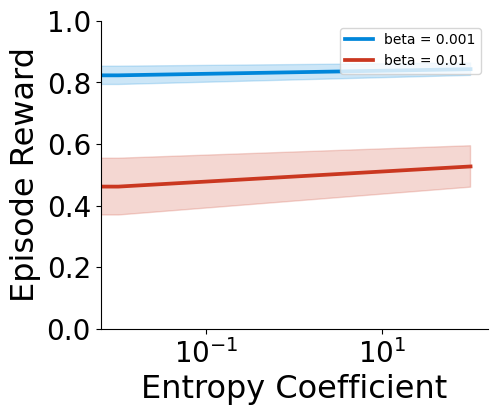

In [ ]:
label_map = {0.0: "PPO", 0.001: "beta = 0.001", 0.01: "beta = 0.01"}
agg_func_const = 0.0
determ_env_df = average_df
determ_env_df = determ_env_df.dropna()
determ_env_df = determ_env_df[determ_env_df['beta'].isin([0.001, 0.01])]
determ_env_df = determ_env_df[determ_env_df['learning_rate'].isin([0.00003])]
determ_env_df = determ_env_df[determ_env_df['ppo_entropy_coef'].isin([0.0003])]



set_matplotlib_style(style='4-row')
determ_env_df = determ_env_df[determ_env_df['count']]
# determ_env_df = determ_env_df['beta'].isin([0.0, 0.001])


for env_name, group in determ_env_df.groupby(['env_name']):
  print(env_name)
  env_name = env_name[0]

  group['beta_label'] = group['beta'].map(label_map)
  hue_labels = group['beta'].apply(lambda x: f'beta = {x}')

  
  max_step = group['step'].max()
  if 'crossing' in env_name.lower():
    max_step = int(8e5)
  elif 'key' in env_name.lower():
    max_step = int(7e5)
  rl_start_step = group.iloc[0]['rl_start_step']

  len_classes = len(group.groupby(['beta']).nunique())
  color_palette = get_color_palette(n=len_classes)
  sns.lineplot(
    group, x='agg_func_const', y='ep_reward', hue='beta_label',
    errorbar=t_distrib, palette=color_palette)
  
#   plt.axvline(x=rl_start_step, color='black', linestyle='--', alpha=0.3, linewidth=2)
  
  # plt.title(f'{standardize_env_name(env_name)}')
#   plt.title("Learning Rate = " + str(learning_rate))
  # set_fig_labels('Time Steps', 'Episode Length', xsci=True)
  plt.xscale('log')

  max_y = group['ep_reward'].max()
  max_y = int(np.ceil(max_y / 100)) * 100
  plt.ylim(0, 1)
  plt.xlim(0, )

  plt.ylabel("Episode Reward")
  plt.xlabel("Entropy Coefficient")
   
  plt.legend(loc='upper right')



  # save_fig_versions(f'{standardize_env_name(env_name)}_delayed_rl_ep_len', type='png',dir='../../../figures/png')
  plt.show()

In [ ]:
data_path = 'data/model-free-minigrid-short-all-params_data.csv'
df = pd.read_csv(data_path, index_col=0)
df['Model Type'] = df['ae_model_type']


model_type_map = {
  'ae': 'Continuous',
  'vqvae': 'Discrete',
  'fta_ae': 'FTA',
  'softmax_ae': 'Softmax AE',
}
df['Model Type'] = df['Model Type'].apply(lambda x: model_type_map[x])
df['Model Type'] = df.apply(
  (lambda x: x['Model Type'] if x['ae_recon_loss'] else 'End-to-End'), axis=1)

# Remove all softmax
df = df[df['ae_model_type'] != 'softmax_ae']

In [ ]:
# df = df.drop('experiment_key', axis=1)
params = ['ae_model_type', 'ae_recon_loss',	'beta',	'codebook_size', 'count', 'env_name', 'filter_size', 
          'learning_rate', 'rl_start_step', 'Model Type', 'ppo_entropy_coef', 'agg_func_const', 'experiment_key']

df = df[df['step'] >= 500000]

average_df = df.groupby(params, as_index=False).mean()

average_df

,ae_model_type,ae_recon_loss,beta,codebook_size,count,env_name,filter_size,learning_rate,rl_start_step,Model Type,ppo_entropy_coef,agg_func_const,experiment_key,step,ep_length,ep_reward,reward,entropy
0,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.000003,500000,Discrete,0.0,0.0,0772216c49944911a3b551a4fcfae600,1000000.0,87.798423,0.127944,2.799503e-03,3.902903
1,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.000003,500000,Discrete,0.0,0.0,08813fe74dfa4ca59b350e01eb9b0e46,1000000.0,99.996832,0.000048,4.831683e-07,3.708907
2,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.000003,500000,Discrete,0.0,0.0,16ed159f3aab48729966a7ab3cf544eb,1000000.0,92.186554,0.082971,1.582051e-03,3.696772
3,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.000003,500000,Discrete,0.0,0.0,1b9ae676bb8c4cfea6a37473301cda4b,1000000.0,66.582166,0.346312,1.268185e-02,3.871579
4,vqvae,True,0.00,256,True,minigrid-door-key-stochastic,6,0.000003,500000,Discrete,0.0,0.0,20dad4ef812d45489580c3f2e9f5ac25,1000000.0,99.986572,0.000210,2.102970e-06,3.601913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.003000,500000,Discrete,0.3,100.0,c3c846dd15e14ea1bb5821a287624a4e,1000000.0,99.992277,0.000109,2.352141e-04,2.275780
3819,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.003000,500000,Discrete,0.3,100.0,ca7be641d77a4ebb8212f15450c28714,965000.0,99.989278,0.000150,3.530647e-03,2.286141
3820,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.003000,500000,Discrete,0.3,100.0,d4231854cd4648498bff7493eb3f79d4,1000000.0,99.997525,0.000052,2.346423e-04,2.282527
3821,vqvae,True,0.01,256,True,minigrid-door-key-stochastic,6,0.003000,500000,Discrete,0.3,100.0,e96c9c03059c4bdc9f9ed761b9da778c,1000000.0,99.993861,0.000115,2.352717e-04,2.284943


In [ ]:
params = ['ae_model_type', 'ae_recon_loss',	'beta',	'codebook_size', 'count', 'env_name', 'filter_size', 
          'learning_rate', 'rl_start_step', 'Model Type', 'ppo_entropy_coef', 'agg_func_const']

average_df = average_df.drop(columns=['experiment_key'])

average_df = average_df.groupby(params, as_index=False).mean()


,ae_model_type,ae_recon_loss,beta,codebook_size,count,env_name,filter_size,learning_rate,rl_start_step,Model Type,ppo_entropy_coef,agg_func_const,step,ep_length,ep_reward,reward,entropy
5,vqvae,True,0.000,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0000,0.00,1000000.000000,94.142520,0.060150,0.002935,3.046151
6,vqvae,True,0.000,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0003,0.00,972333.333333,88.328421,0.120086,0.005576,2.308753
7,vqvae,True,0.000,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0030,0.00,958703.703704,99.987179,0.000181,0.000002,2.277298
8,vqvae,True,0.000,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0300,0.00,971551.724138,99.989643,0.000147,0.000001,2.281808
9,vqvae,True,0.000,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.3000,0.00,972068.965517,99.989756,0.000142,0.000001,2.282457
34,vqvae,True,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0000,0.00,1000000.000000,89.915348,0.103623,0.005013,3.263072
35,vqvae,True,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0000,0.01,1000000.000000,63.853373,0.371755,0.017471,4.044334
36,vqvae,True,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0000,100.00,983333.333333,42.019156,0.595281,0.029090,3.812300
37,vqvae,True,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0003,0.00,991250.000000,72.513670,0.282708,0.013200,2.396447
38,vqvae,True,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0003,0.01,998000.000000,52.270885,0.491033,0.022847,2.496596


In [ ]:
average_df = average_df[average_df['learning_rate'].isin([0.00003])]
average_df = average_df[average_df['ppo_entropy_coef'].isin([0.0])]
average_df = average_df[average_df['beta'].isin([0.01, 0.001])]

average_df

,ae_model_type,ae_recon_loss,beta,codebook_size,count,env_name,filter_size,learning_rate,rl_start_step,Model Type,ppo_entropy_coef,agg_func_const,step,ep_length,ep_reward,reward,entropy
34,vqvae,True,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0,0.00,1000000.000000,89.915348,0.103623,0.005013,3.263072
35,vqvae,True,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0,0.01,1000000.000000,63.853373,0.371755,0.017471,4.044334
36,vqvae,True,0.001,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0,100.00,983333.333333,42.019156,0.595281,0.029090,3.812300
89,vqvae,True,0.010,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0,0.00,1000000.000000,67.359624,0.335630,0.016100,3.726589
90,vqvae,True,0.010,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0,0.01,1000000.000000,66.717719,0.342920,0.017302,4.104095
91,vqvae,True,0.010,256,True,minigrid-door-key-stochastic,6,0.00003,500000,Discrete,0.0,100.00,1000000.000000,51.170663,0.502295,0.025770,4.162082


('minigrid-door-key-stochastic',)


/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_73313/1776813850.py:48: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, )


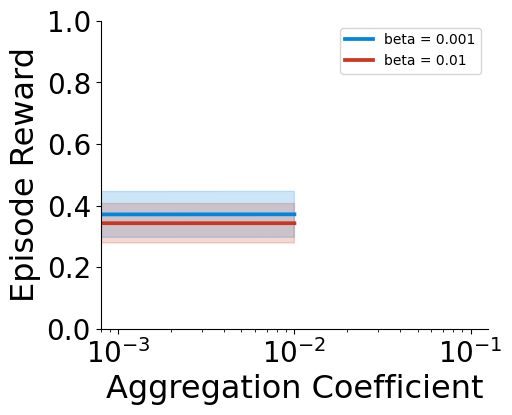

In [ ]:
label_map = {0.0: "PPO", 0.001: "beta = 0.001", 0.01: "beta = 0.01"}
agg_func_const = 0.0
determ_env_df = average_df
determ_env_df = determ_env_df.dropna()
determ_env_df = determ_env_df[determ_env_df['beta'].isin([0.001, 0.01])]
determ_env_df = determ_env_df[determ_env_df['learning_rate'].isin([0.00003])]
determ_env_df = determ_env_df[determ_env_df['ppo_entropy_coef'].isin([0.0])]
determ_env_df = determ_env_df[determ_env_df['agg_func_const'].isin([0, 0.01])]



set_matplotlib_style(style='4-row')
determ_env_df = determ_env_df[determ_env_df['count']]
# determ_env_df = determ_env_df['beta'].isin([0.0, 0.001])


for env_name, group in determ_env_df.groupby(['env_name']):
  print(env_name)
  env_name = env_name[0]

  group['beta_label'] = group['beta'].map(label_map)
  hue_labels = group['beta'].apply(lambda x: f'beta = {x}')

  
  max_step = group['step'].max()
  if 'crossing' in env_name.lower():
    max_step = int(8e5)
  elif 'key' in env_name.lower():
    max_step = int(7e5)
  rl_start_step = group.iloc[0]['rl_start_step']

  len_classes = len(group.groupby(['beta']).nunique())
  color_palette = get_color_palette(n=len_classes)
  sns.lineplot(
    group, x='agg_func_const', y='ep_reward', hue='beta_label',
    errorbar=t_distrib, palette=color_palette)
  
#   plt.axvline(x=rl_start_step, color='black', linestyle='--', alpha=0.3, linewidth=2)
  
  # plt.title(f'{standardize_env_name(env_name)}')
#   plt.title("Learning Rate = " + str(learning_rate))
  # set_fig_labels('Time Steps', 'Episode Length', xsci=True)
  plt.xscale('log')

  max_y = group['ep_reward'].max()
  max_y = int(np.ceil(max_y / 100)) * 100
  plt.ylim(0, 1)
  plt.xlim(0, )

  plt.ylabel("Episode Reward")
  plt.xlabel("Aggregation Coefficient")
   
  plt.legend(loc='upper right')



  # save_fig_versions(f'{standardize_env_name(env_name)}_delayed_rl_ep_len', type='png',dir='../../../figures/png')
  plt.show()